# **CNN Implementation for MNIST Digit Recognition**

**Team Members List:**

| Team Member Name | Student ID  |GitHub Username    | GitHub Repo Link |
|------------------|-------------|-----------------  |------------------|
| Prayukti Dahal   | 101145484   |    prayuktii      | [GitHub Repo](https://github.com/Prayuktii/MLF_CSC722_CNN_Project) |
| Anushuya Baidya  | 101163891   | anushuyabaidya    | [GitHub Repo](https://github.com/anushuyabaidya/CNN_with_MNIST) |
| Binamra Neupane  | 101169010   |    namre10        | [GitHub Repo](https://github.com/namre10/CNN_Scratch) |
| Nisha Lamgade    | 101161837   |  nishalamgade     | [GitHub Repo](https://github.com/nishalamgade/CNN_MLF_Team_Project) |
| Manisha Senchuri | 101162804   |manishasenchuri0103| [GitHub Repo](https://github.com/ManishaSenchuri0103/CNN_MLF_Team_Project) |






# Importing Required Packages

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



# Loading the MNIST Dataset

In [ ]:
# Retrieving the MNIST dataset for optical recognition of handwritten digits
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# Extracting features and targets from the dataset
X = optical_recognition_of_handwritten_digits.data.features.values
y = optical_recognition_of_handwritten_digits.data.targets.values

# Displaying metadata information of the dataset
print(optical_recognition_of_handwritten_digits.metadata)

# Printing variable information of the dataset
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

# Data Preprocessing and Samples Visualization



In [ ]:
# Preprocess the data -> Reshaping the input data and normalizing pixel values to [0, 1]
X = X.reshape(-1, 8, 8, 1) / 16.0

## Splitting the Dataset to 80/20 (Hold-out Method / Split based Method)

In [ ]:
# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
train_images, test_images = X[:train_size], X[train_size:]
train_labels, test_labels = y[:train_size], y[train_size:]


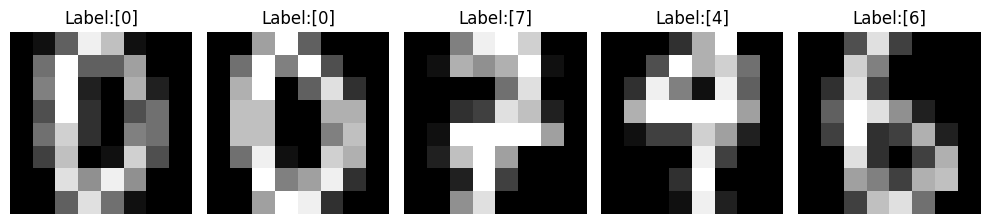

In [ ]:
# Displaying the actual sample images from the MNIST dataset
num_samples_to_display = 5
plt.figure(figsize=(10, 4))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label:{train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Implementation of Convolutional Neural Network(CNN)



In [ ]:
# Defining the CNN model architecture with multiple convolutional layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(4, 4, 32), name='conv2d_1'),
    MaxPooling2D((2, 2), name='max_pooling2d_1'),
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_2'),
    MaxPooling2D((2, 2), name='max_pooling2d_2'),
    Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2d_3'),  # Additional convolutional layer
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='dense_1'),
    Dense(10, activation='softmax', name='dense_2')
])

# Dictionary to store layer information
layer_info = {}

# Iterate over model layers to collect layer information
for layer in model.layers:
    # Extract layer name, shape, and parameters
    layer_name = layer.name
    layer_shape = layer.output_shape
    layer_params = layer.count_params()
    # Add layer information to the dictionary
    layer_info[layer_name] = {
        "Layer Shape": layer_shape,
        "Layer Parameters": layer_params
    }

# Converting layer information dictionary to DataFrame for easy display
layer_df = pd.DataFrame.from_dict(layer_info, orient='index')
print(layer_df)



                       Layer Shape  Layer Parameters
conv2d_1          (None, 4, 4, 32)              9248
max_pooling2d_1   (None, 2, 2, 32)                 0
conv2d_2          (None, 2, 2, 64)             18496
max_pooling2d_2   (None, 1, 1, 64)                 0
conv2d_3         (None, 1, 1, 128)             73856
flatten                (None, 128)                 0
dense_1                 (None, 64)              8256
dense_2                 (None, 10)               650


# Compilation and Model Training

In [ ]:
# Compiling the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model with 10 epochs using the training data and validate it using the test data
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
141/141 [==============================] - 4s 17ms/step - loss: 0.8319 - accuracy: 0.7616 - val_loss: 0.2527 - val_accuracy: 0.9173
Epoch 2/10
141/141 [==============================] - 1s 9ms/step - loss: 0.1505 - accuracy: 0.9520 - val_loss: 0.1462 - val_accuracy: 0.9528
Epoch 3/10
141/141 [==============================] - 1s 9ms/step - loss: 0.0975 - accuracy: 0.9677 - val_loss: 0.1128 - val_accuracy: 0.9644
Epoch 4/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0740 - accuracy: 0.9762 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 5/10
141/141 [==============================] - 1s 10ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0937 - val_accuracy: 0.9715
Epoch 6/10
141/141 [==============================] - 1s 9ms/step - loss: 0.0423 - accuracy: 0.9862 - val_loss: 0.0638 - val_accuracy: 0.9778
Epoch 7/10
141/141 [==============================] - 1s 8ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0796 - val_accuracy: 0.9742
Epoc

In [ ]:
# Access the first convolutional layer
conv1_layer = model.layers[0]

# Compute the output of the first convolutional layer
conv1_output = conv1_layer(train_images[:1]).numpy()

# Access the second convolutional layer
conv2_layer = model.layers[2]

# Compute the output of the second convolutional layer
conv2_output = conv2_layer(conv1_output).numpy()


In [ ]:
print(conv2_layer.input_shape)

(None, 4, 4, 32)


In [ ]:
print(train_images[:1].shape)

(1, 8, 8, 1)


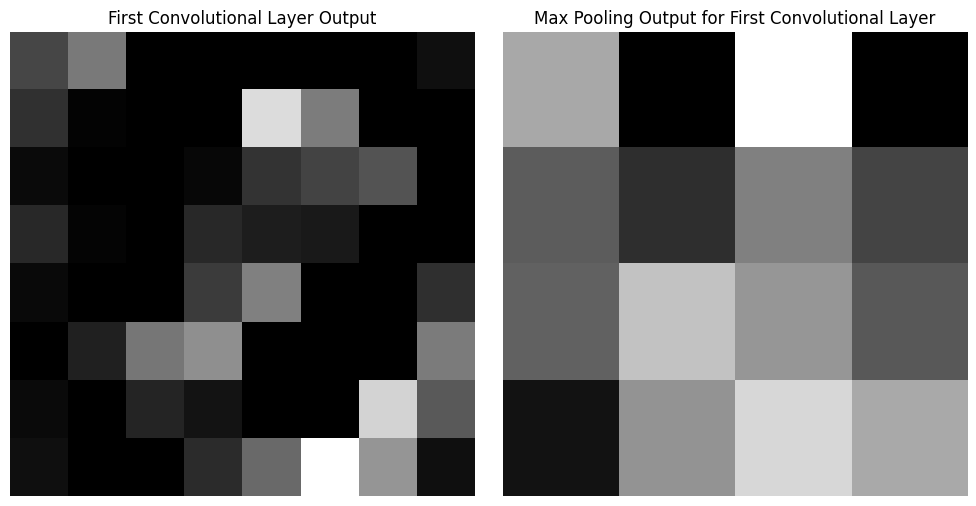

In [ ]:
# Display original and max pooled images for the first convolutional layer
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(conv1_output[0, :, :, 0], cmap='gray')  # Display output of first convolutional layer
plt.title('First Convolutional Layer Output')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(max_pool_output[0, :, :, 0], cmap='gray')  # Display output of max pooling
plt.title('Max Pooling Output for First Convolutional Layer')
plt.axis('off')
plt.tight_layout()
plt.show()


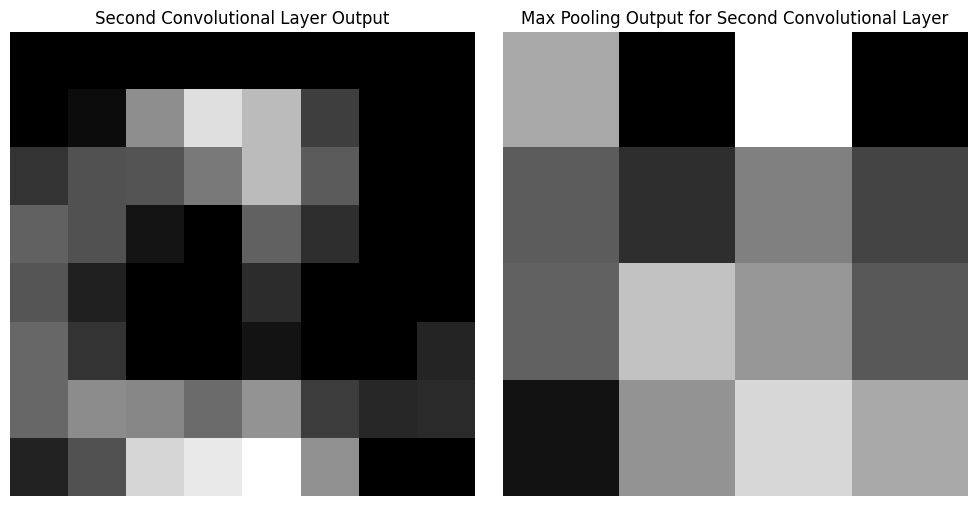

In [ ]:
# Access the second convolutional layer

# Display original and max pooled images for the second convolutional layer
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(conv2_output[0, :, :, 0], cmap='gray')  # Display output of second convolutional layer
plt.title('Second Convolutional Layer Output')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(max_pool_output[0, :, :, 0], cmap='gray')  # Display output of max pooling
plt.title('Max Pooling Output for Second Convolutional Layer')
plt.axis('off')
plt.tight_layout()
plt.show()

# Evaluation on Test Set

In [ ]:
# Evaluating the model accuracy on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

36/36 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9742
Test accuracy: 0.9742


# Training and Validation Evaluation & Loss Metrics

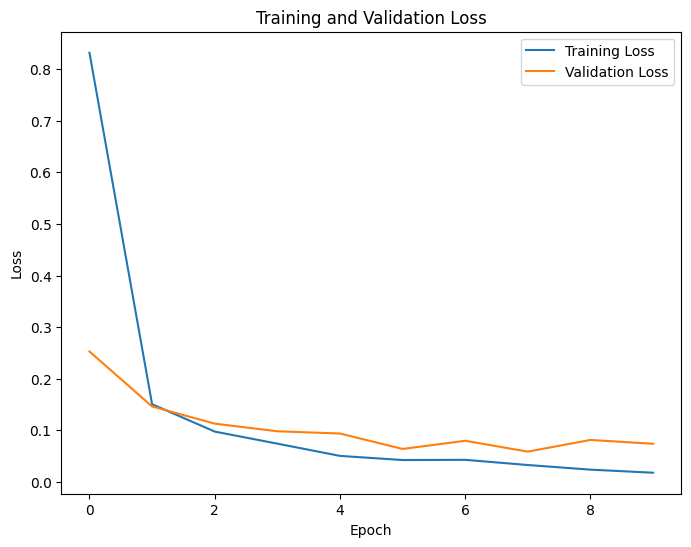

In [ ]:
# Plotting the training and validation loss curves to visualize the model's training progress
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predicting the labels for test data
test_pred = np.argmax(model.predict(test_images), axis=-1)

# Calculating the evaluation metrics
accuracy = accuracy_score(test_labels, test_pred)
precision = precision_score(test_labels, test_pred, average='weighted')
recall = recall_score(test_labels, test_pred, average='weighted')
f1 = f1_score(test_labels, test_pred, average='weighted')

# Printing the values of evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

36/36 [==============================] - 0s 4ms/step
Accuracy: 0.9742
Precision: 0.9755
Recall: 0.9742
F1-Score: 0.9739


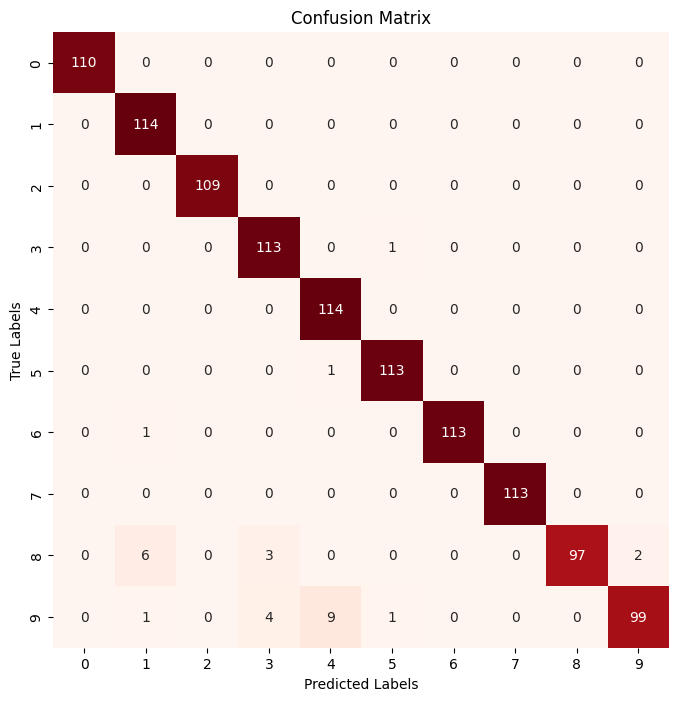

In [ ]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, square=True,
            xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# K- fold Cross Validation for k = 5 (Splits)

In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_acc = []
for train_idx, val_idx in kfold.split(train_images, train_labels):
    x_train, x_val = train_images[train_idx], train_images[val_idx]
    y_train, y_val = train_labels[train_idx], train_labels[val_idx]
    model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    fold_acc.append(model.evaluate(x_val, y_val)[1])

print(f'K-fold cross-validation accuracy: {sum(fold_acc) / len(fold_acc):.4f}')

Epoch 1/10
113/113 [==============================] - 3s 23ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0108 - val_accuracy: 0.9967
Epoch 2/10
113/113 [==============================] - 2s 22ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0120 - val_accuracy: 0.9956
Epoch 3/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0179 - val_accuracy: 0.9933
Epoch 4/10
113/113 [==============================] - 2s 15ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0270 - val_accuracy: 0.9933
Epoch 5/10
113/113 [==============================] - 1s 11ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0316 - val_accuracy: 0.9911
Epoch 6/10
113/113 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0198 - val_accuracy: 0.9956
Epoch 7/10
113/113 [==============================] - 1s 9ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9933


# Creating and Plotting Confusion Matrix after K-fold Cross Validation

36/36 [==============================] - 0s 6ms/step


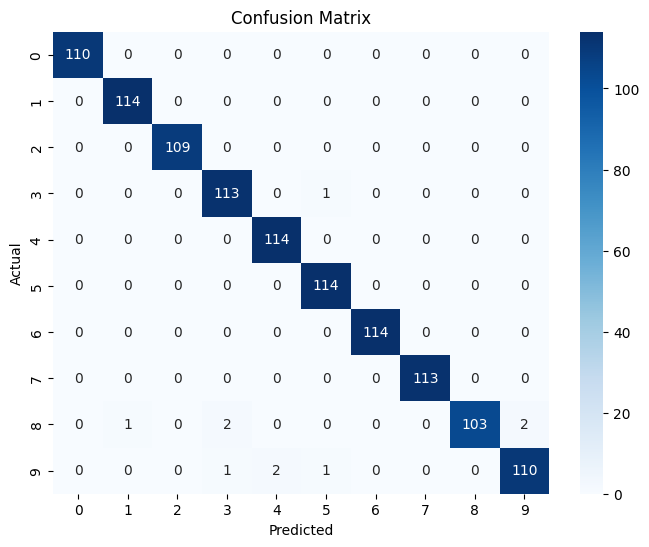

In [ ]:
# Confusion matrix
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()